In [1]:
import numpy as np
import pandas as pd

In [2]:
nba = pd.read_csv("nba_2013.csv")
nba.head(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
# checking missing value
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [5]:
# lets segrete data into contineous and categorical
cont_data = nba.select_dtypes(["int64","float64"])
cat_data = nba.select_dtypes("object")

In [6]:
cont_data.isna().sum()

age            0
g              0
gs             0
mp             0
fg             0
fga            0
fg.            2
x3p            0
x3pa           0
x3p.          67
x2p            0
x2pa           0
x2p.           3
efg.           2
ft             0
fta            0
ft.           20
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
pts            0
season_end     0
dtype: int64

In [7]:
for feature in cont_data.columns:
    if cont_data[feature].dtypes=="float64":
        cont_data[feature].fillna(cont_data[feature].mean(),inplace=True)  

C:\Users\Satya\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
for feature in cont_data.columns:
    if cont_data[feature].dtypes=="int64":
        cont_data[feature].fillna(cont_data[feature].mean(),inplace=True)

In [9]:
cont_data.isna().sum()

age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg.           0
x3p           0
x3pa          0
x3p.          0
x2p           0
x2pa          0
x2p.          0
efg.          0
ft            0
fta           0
ft.           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
season_end    0
dtype: int64

In [10]:
# lets check the same for categorical data
cat_data.isna().sum()

player          0
pos             0
bref_team_id    0
season          0
dtype: int64

In [11]:
# lets drop the Player Column as its the name of players
cat_data.drop(["player"],1).head()

,pos,bref_team_id,season
0,SF,TOT,2013-2014
1,C,OKC,2013-2014
2,PF,TOT,2013-2014
3,SG,ORL,2013-2014
4,C,NOP,2013-2014


In [12]:
# now lets use label encoding for categorical column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
for data in cat_data.columns:
    cat_data[data]=le.fit_transform(cat_data[data])

C:\Users\Satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# lets merge the cat and cont data
com_data = pd.concat([cont_data,cat_data],1)
com_data.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,stl,blk,tov,pf,pts,season_end,player,pos,bref_team_id,season
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,23,26,30,122,171,2013,370,5,28,0
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,40,57,71,203,265,2013,431,0,20,0
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,24,36,39,108,362,2013,212,3,28,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,35,3,146,136,1330,2013,39,6,21,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,23,46,63,187,328,2013,12,0,18,0


In [15]:
# lets divide the data into features and target
x = com_data.drop(["pts"],1)
y = com_data["pts"]

In [16]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
scale = SC.fit_transform(x)

C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
scale.shape, y.shape

((481, 30), (481,))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scale,y,train_size=0.75,random_state=100)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((360, 30), (121, 30), (360,), (121,))

In [19]:
from sklearn.neighbors import KNeighborsRegressor
Kr = KNeighborsRegressor()
Kr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [20]:
y_pred = Kr.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
k_score = r2_score(y_test,y_pred)
k_score

0.9524273860225179

In [22]:
import seaborn as sns
sns.regplot(y_test, y_pred, data=com_data, fit_reg=True,color="red") 

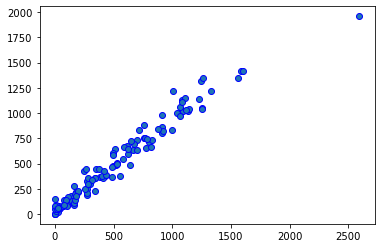

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=y_test,y=y_pred,edgecolors="blue")
plt.show()